<a href="https://colab.research.google.com/github/giovanni-br/numerical-calculus-computational-Physics/blob/master/logistic_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------------------------------------------------------
Giovanni Benedetti da Rosa Nº:00121234

---------------------------------------------------------------------------
O mapa logístico é uma família de funções que representa um modelo que descreve a dinâmica populacional através de uma escala discreta de tempo:
$$x_{n+1} = 4 \lambda x_n (1-x_n)$$

Considerando $x_0 = 0.51$, como condição inicial, e diferentes valores de $\lambda \in[0.7, 1.0]$, analisou-se o comportamento dinâmico desse mapa. Especificamente, analisou-se os valores $\lambda_1 = 0.70, \lambda_2 = 0.80, \lambda_3 = 0.88, \lambda_4 = 1.00$, para a construção de gráficos da série temporal da equação, de mapa de teia e de primeiro retorno.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
lam = [0.70,0.80,0.88,1.00]
x_0 = 0.51
N = 700

def logistic_map(lam, x):
   return 4*lam*x*(1.0-x)
  
def logistic_map_derivate(lam, x):
   return 4*lam*(1.0-2*x)

def teia(x):
  A = np.zeros(2*len(x)-1)
  A[0]=x[0]
  for i in range(len(x)-1):
    A[2*i+1] = x[i]
    A[2*i+1+1] = x[i+1]
  B = np.roll(A, -1)
  B[0], B[-1] = 0, x[-1] 
  return A, B

# Série Temporal $x_{n}$ x $n$
Nesse gráfico pode-se notar que para $\lambda = 0.7$, os valores de $x_{n}$ convergem para um único ponto, após determinado número de iterações, simbolizando assim um ponto fixo estável para a equação, com esse valor de $\lambda$. Para $\lambda = 0.8$ e $\lambda = 0.88$, nota-se ciclos estáveis para essas condições com períodos de $2^{n}$. Já em $\lambda = 1.0$, não nota-se um padrão cíclico definido. Isso ocorre em conssonância com cálculos teóricos já que $\lambda = 0.89$ há um número infinito de pontos fixos, com diferentes periodicidades e infinitos ciclos de diferentes períodos.

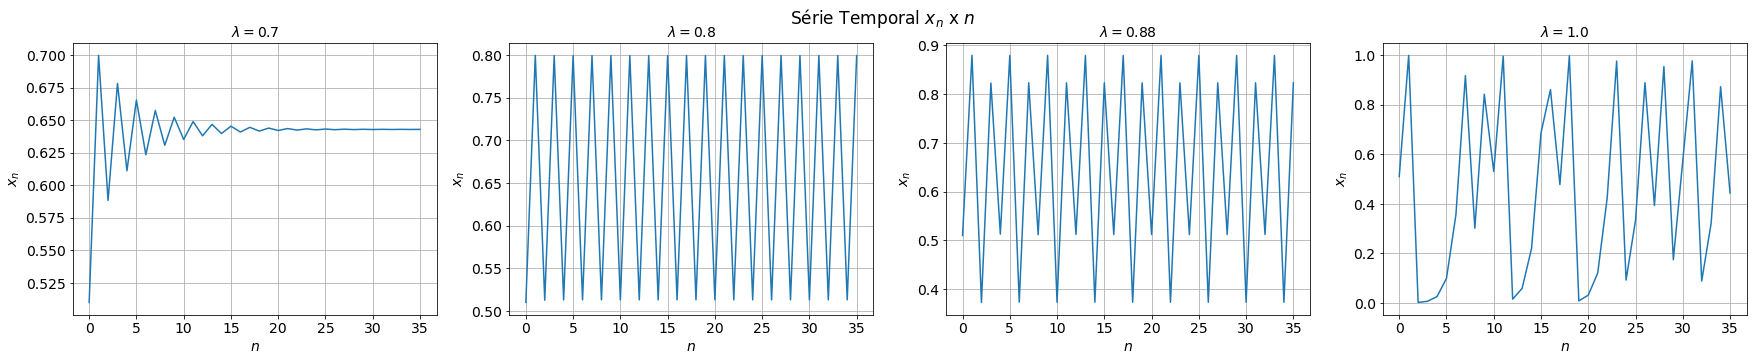

In [8]:

fig, axs = plt.subplots(nrows=1, ncols=len(lam), sharex=True, figsize=(30, 5))
fig.suptitle('Série Temporal $x_{n}$ x $n$', fontsize = 17)
N = 35
z = 0
for l in lam:
  x = [x_0]
  for i in range(N):
    x.append(logistic_map(l, x[i]))
  x = np.array(x)
  t = range(N+1)
  axs[z].set_title(label='$\lambda = $' + str(l), fontsize = 14)
  axs[z].plot(t, x)
  axs[z].set_xlabel((r"$n$"), fontsize = 14)
  axs[z].set_ylabel((r"$x_{n}$"), fontsize = 14)
  axs[z].xaxis.set_tick_params(labelsize=14)
  axs[z].yaxis.set_tick_params(labelsize=14)
  axs[z].grid(True)
  z+=1
plt.show()

# Mapa de teia

No mapa de teia, observa-se como se dá a estabilidade  dos pontos fixos e de ciclos com relação a evolução temporal da equação. Assim, nos quatro gráficos, nota-se uma reta partindo da condição inicial $x_{0} = 0.51$. Da mesma forma que no gráfico anterior, é possível notar para  $\lambda = 0.7$, o $x_{n}$ tendendo a um valor definido, e para os valores de  $\lambda = 0.8$ e $\lambda = 0.88$, órbitas periódicas. Nesse sentido,  para $\lambda = 1.0$, nota-se infinitos ciclos com diferentes periodicidades. Utilizou-se N=600 para realizar tal análise.


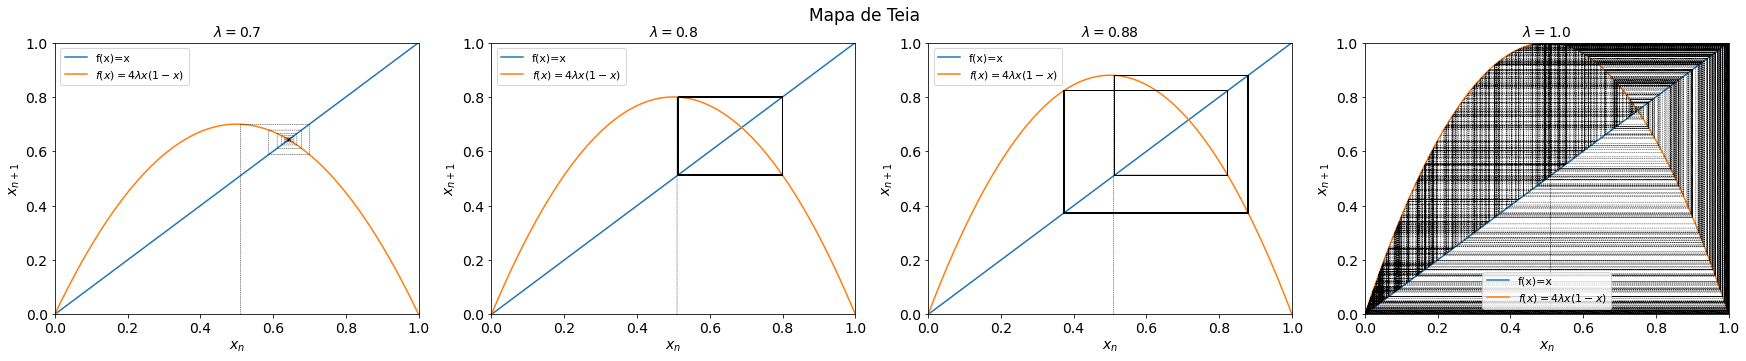

In [9]:
N = 600
fig, axs = plt.subplots(nrows=1, ncols=len(lam), sharex=True, figsize=(30, 5))
fig.suptitle('Mapa de Teia', fontsize = 17)
z = 0
for l in lam:
  y = [x_0]
  for i in range(N):
    y.append(logistic_map(l, y[i]))
  x = np.linspace(0,1, N+1)
  axs[z].plot(x,x, label='f(x)=x')
  axs[z].plot(x, logistic_map(l, x), label='$f(x)=4 \lambda x(1-x)$')
  Ax, Ay  = teia(y)
  axs[z].plot(Ax, Ay,  'k--', lw = 0.4)
  axs[z].set_xlim(0, 1)
  axs[z].set_ylim(0, 1)
  axs[z].set_title('$\lambda = $' + str(l), fontsize = 14)
  axs[z].set_ylabel('$x_{n+1}$', fontsize = 14)
  axs[z].set_xlabel('$x_{n}$', fontsize = 14)
  axs[z].legend(fontsize = 11)
  axs[z].xaxis.set_tick_params(labelsize=14)
  axs[z].yaxis.set_tick_params(labelsize=14)
  z = z+1
plt.show()

# Mapa de primeiro retorno

O mapa de primeiro retorno é construído através da matriz: 
$$M_{ij} = \begin{cases} 1,\ se\ |x_{i}- x_{j}|< ϵ \\ 0,\ caso\ contrário \end{cases}$$

$$ϵ = 10^{-4}$$
Assim, pode-se observar o quão próximo os valores se encontram após determinado número de iterações. Para que a visualização ficasse mais evidente, utilizou-se  N = 50 exceto para $\lambda=0.1$, no qual utilizou-se N = 1000.

Novamente, fica evidente que os valores de $x_{n}$ para $\lambda=0.7$, ficam suficientemente próximos somente após, determinado número de iterações. Para $\lambda=0.8$, $\lambda=0.88$, fica evidente que após um tempo transiente os valores passam ciclicamente a ficarem iguais, sendo o período dos $\lambda=0.88$ o dobro dos de $\lambda=0.8$, podendo tal fato ser visualizado pela evidência de que o número de pontos presentes em cada "quadradinho" do *grid* ser aproximadamente o dobro. No caso de $\lambda=1.0$, essa igualdade passa a não ter um padrão definido, pois se encontra em um período caótico, cuja causa já foi previamente explicitada.

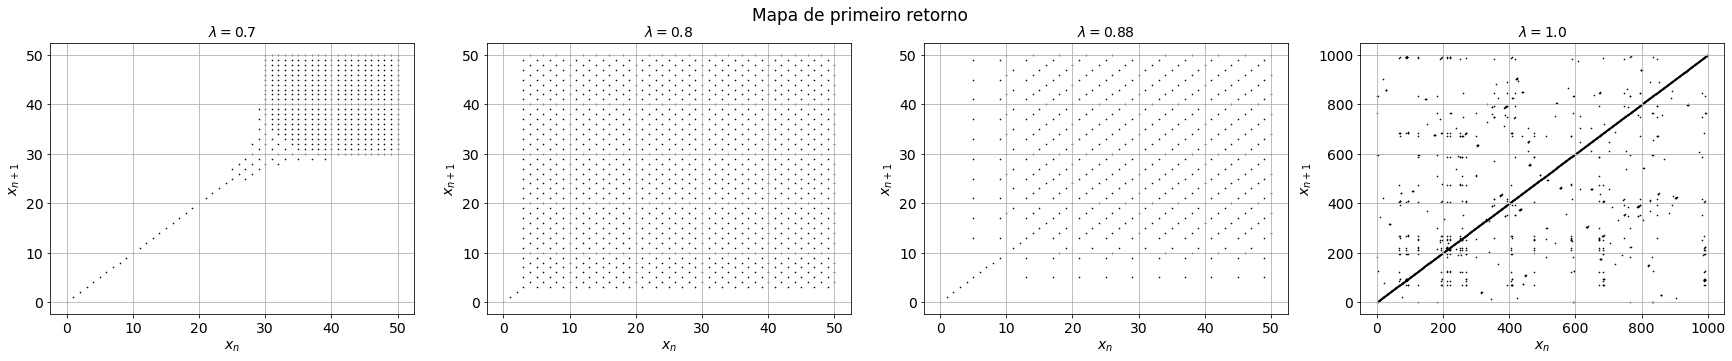

In [10]:
N = 50
fig, ax = plt.subplots(nrows=1, ncols=len(lam), figsize=(30, 5))
fig.suptitle('Mapa de primeiro retorno', fontsize = 17)
z=0
for l in lam:
  if l==1.0:
    N = 1000
  y = [x_0]
  for i in range(N):
    y.append(logistic_map(l, y[i]))

  X = []
  Y = []
  for i in range(len(y)):
    for j in range(len(y)):
      if(abs(y[i]-y[j])<1e-4):
        X.append(i)
        Y.append(j)
  ax[z].scatter(X, Y, color = 'k', s = 0.4)
  ax[z].set_title('$\lambda = $' + str(l), fontsize = 14)
  ax[z].set_ylabel('$x_{n+1}$', fontsize = 14)
  ax[z].set_xlabel('$x_{n}$', fontsize = 14)
  ax[z].xaxis.set_tick_params(labelsize=14)
  ax[z].yaxis.set_tick_params(labelsize=14)
  ax[z].grid()
  z = z+1
plt.show()

#Mapa de bifurcação

O mapa de bifurcação representa como se comporta a evolução do mapa em termos de estabilidades e ciclos, após as iterações, com diferentes valores de $\lambda$. Pode-se notar que a partir de $\lambda = 0,75$, pasam ocorrer bifurcações que tendem a aumentar a medida em que $\lambda$ aumenta. Isso acontece, pois os pontos fixos passam a se repetir de maneira cíclica, mas não necessariamente consecutiva, tendo um período de repetição que dobra à medida em que $\lambda$ aumenta. Deve-se esperar que à medida que $\lambda$ aumente, o número de ciclos aumente cada vez mais, de forma que a partir de $\lambda = 0.89$, chega-se a uma transição caótica. Utilizou-se N = 700 e descartou-se os 300 primeiros valores em cada iteração.

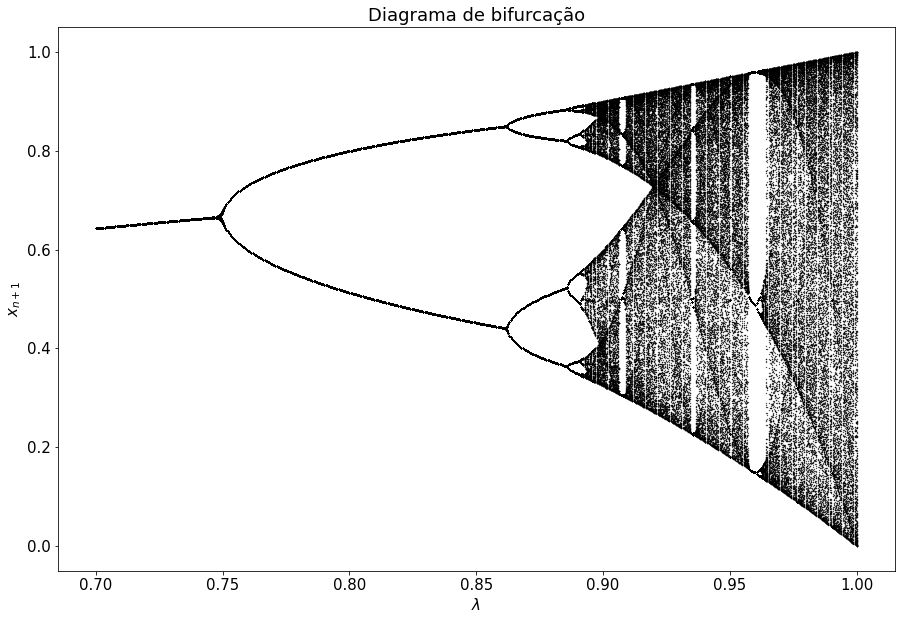

In [11]:
N = 700
lam = np.linspace(0.7,1,N)
x_plot = []
l_plot = []
lyapunov = []
for l in lam:
    x = [x_0]
    coef = []
    for i in range(N):
        prox = logistic_map(l, x[i])
        x.append(prox)
        coef.append(np.log(abs(logistic_map_derivate(l, prox))))
        if i >= 300:
            l_plot.append(l)
            x_plot.append(prox)
            lyapunov.append(np.mean(coef))
            
plt.figure(figsize=(15,10))
plt.ylabel('$x_{n+1}$', fontsize = 15)
plt.xlabel('$\lambda$', fontsize = 15)
plt.title('Diagrama de bifurcação', fontsize = 18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.scatter(l_plot,x_plot, 0.1, color = 'k')
plt.show()


# Coeficiente de Lyapunov
O coeficiente de Lyapunov representa a taxa com que a distância entre duas trajetórias, que se iniciam muito próximas entre si, varia no tempo.  Considera-se que duas trajetórias iniciam com as respectivas posições:
$x_{0}$ e $x_{0} + \delta_{0}$, e variam no tempo conforme $x_{n}$ e $x_{n} + \delta_{n}$. Assim, já que $\delta_{n}$ é um valor muito pequeno, pode-se realizar uma expansão em série de Taylor de 1ª ordem, em torno de $x_{n}$: 

$$f(x_{n} + \delta_{n}) = f(x_{n}) + f'(x_{n})\delta_{n} \implies 
\delta_{n+1} = f'(x_{n})\delta_{n}$$

Recursivamente:
$$\bigg|{\frac{\delta_{0}}{\delta_{n}}}\bigg| = \prod_{i=0}^{n-1}|f'(x_{i})|$$
Assumindo que a quantidade varie exponencialmente, com $n->∞$:
$$\bigg|{\frac{\delta_{0}}{\delta_{n}}}\bigg| =e^{\lambda_{L}n}$$
Assim, define-se o coeficiente de Lyapunov($\lambda_{L}$)
$$\lambda_{L} = \lim_{n\to\infty}\frac{1}{n}\sum_{i=1}^{n}ln|f'(x_{i})|$$

Dessa maneira, se $\lambda_{L}>0$, as trajetórias, inicialmente próximas, se distanciam para n tendendo ao infinito, e tem-se o que se chama de comportamento caótico. Por outro lado, se $\lambda_{L}<0$, as trajetórias se aproximam e convergem assintoticamente para um ponto fixo ou limite ciclíco. 








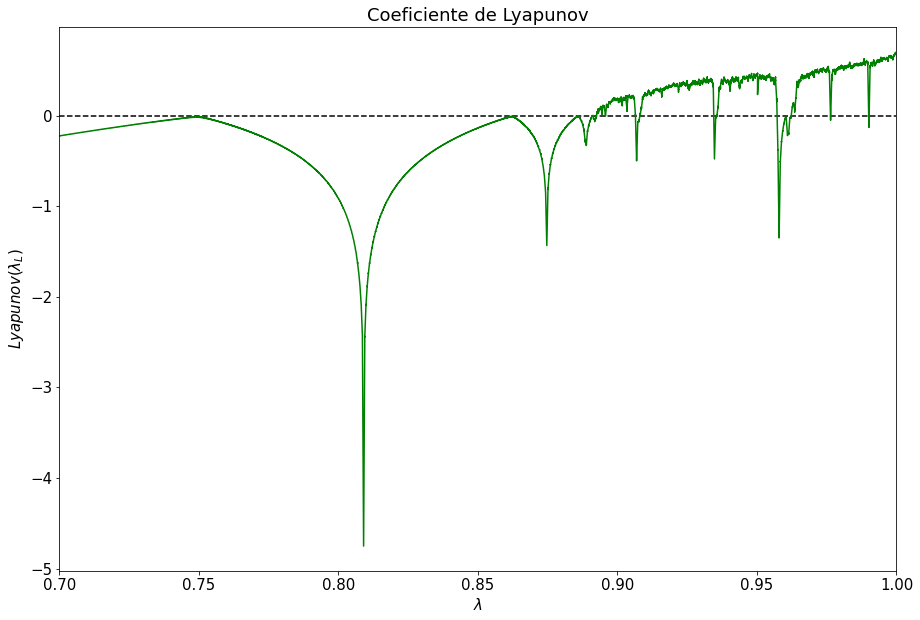

In [12]:
plt.figure(figsize=(15,10))
plt.plot(l_plot, lyapunov, color =  'green')
plt.ylabel('$Lyapunov(\lambda_{L})$', fontsize = 15)
plt.hlines(0, 0.70, 1.0, linestyles='dashed')
plt.xlim(0.70,1)
plt.xlabel('$\lambda$' , fontsize = 15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Coeficiente de Lyapunov', fontsize = 18)
plt.show()

Por fim, afirma-se que os resultados encontrados são coerentes com os cálculos teóricos e com a bibliografia.

# Referências:

[1] HENTZ, A.; FERNANDES, H.; BRUNNET, L. Métodos Computacionais da Física B. 1. ed. UFRGS.

[2] MAY, R. M. Simple mathematical models with very complicated dynamics. Nature, v. 261, n. 5560, p. 459–467, 1 jun. 1976.